## Original Dataset with Scaling and Outliers Removal

In [ ]:
#just for load data
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
retval = os.getcwd()
print ("current Direction", retval)
os.chdir("/content/drive/MyDrive/Colab Notebooks/21Fall8710FinalProject") 
retval = os.getcwd()
print ("current Direction", retval)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np

df=pd.read_csv("./creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
# Scaling

df['New_Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['New_Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,New_Amount,New_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_new = df.drop('Class', axis=1)
y_new = df['Class']
# Split resampled data into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

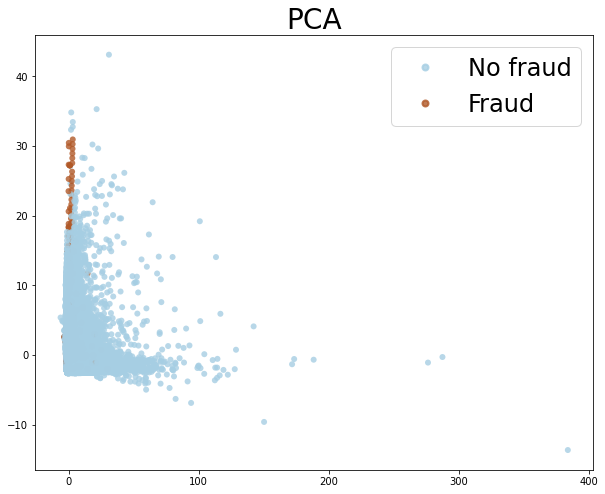

In [ ]:
# PCA

pca = PCA(n_components = 2)
p = pca.fit_transform(X_new)
plt.figure(figsize=(10,8))
# plt.scatter(p[:,0], p[:,1], c = y_resampled, cmap = "Paired", alpha=0.8)
l = ['No fraud','Fraud']
graph = plt.scatter(p[:,0], p[:,1], c=y_new, cmap = "Paired", linewidths=2,alpha=0.8, edgecolors='none') 
plt.legend(handles=graph.legend_elements()[0],labels = l,fontsize=24)
plt.title('PCA', fontsize=28)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


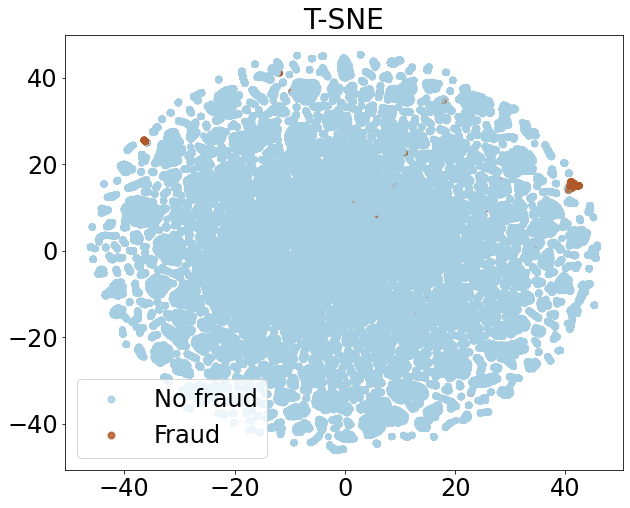

In [ ]:
# T-SNE
from sklearn.manifold import TSNE
import matplotlib

q = TSNE(n_components=2).fit_transform(X_new)
plt.figure(figsize=(10,8))
plt.scatter(q[:,0], q[:,1], c = y_new, cmap = "Paired", alpha=0.8)
l = ['No fraud','Fraud']
graph = plt.scatter(q[:,0], q[:,1], c=y_new, cmap = "Paired", linewidths=2,alpha=0.8, edgecolors='none') 
plt.legend(handles=graph.legend_elements()[0],labels = l,fontsize=24)
plt.title('T-SNE', fontsize=28)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
plt.show()

In [ ]:
### Training Models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
# Logistic Regression

classif = LogisticRegression()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,10.694836,0.863636,0.581633,0.790737,0.695122


In [ ]:
# Random Forest

classif = RandomForestClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,278.493105,0.987013,0.77551,0.887746,0.868571


In [ ]:
# KNN

classif = KNeighborsClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.028742,0.948052,0.744898,0.872414,0.834286


In [ ]:
# MLP

classif = MLPClassifier(alpha=1)
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,58.232841,0.852459,0.530612,0.765227,0.654088


In [ ]:
# GradientBoostingClassifier

classif = GradientBoostingClassifier()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,416.61105,0.7375,0.602041,0.800836,0.662921


In [ ]:
# GaussianNB

classif = GaussianNB()
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1

df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,0.270988,0.060377,0.816327,0.897216,0.112439


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classif = DecisionTreeClassifier(random_state=0)
time_start = time.process_time()
model=classif.fit(X_train, y_train)
time_end = time.process_time()
y_pred = model.predict(X_test)
training_time = time_end - time_start
train_score = classif.score(X_train, y_train)
test_score = classif.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
df_results = pd.DataFrame(data=np.zeros(shape=(1,5)), columns = ['Training_time','Precision_score','Recall_score', 'ROC_score','F1_score'])
df_results.loc[0,'Training_time'] = training_time
df_results.loc[0,'Precision_score'] = precision
df_results.loc[0,'Recall_score'] = recall
df_results.loc[0,'ROC_score'] = roc
df_results.loc[0,'F1_score'] = f1
df_results

,Training_time,Precision_score,Recall_score,ROC_score,F1_score
0,23.29643,0.675214,0.806122,0.902727,0.734884
